# Lab | Principal Component Analysis

### Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [22]:
# Run this code:

%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## Challenge 1 - Reading and Standardizing the Data

In this challenge we will work with image data and reduce the dimensions of the data to create a 2 dimensional plot. While we have not worked much with image data before, it can be represented as a numpy array where each pixel is assigned a numeric value. In this lesson, we will look at a dataset of cats and a dataset of dogs and see whether reducing them to two dimensions allows us to see if the data is separable. We will start by loading and processing the data. Run the cell below to load the two csv files and convert them into numpy arrays.

In [23]:
# Run this code

cats = np.array(pd.read_csv("https://raw.githubusercontent.com/bioramble/pca/master/cat.csv", header=None))
dogs = np.array(pd.read_csv("https://raw.githubusercontent.com/bioramble/pca/master/dog.csv", header=None))

Next, we'll examine the shape of both the cats and the dogs arrays. Print out both shapes below.

In [39]:
# Print the shapes of the cats and dogs arrays to verify their dimensions
print('Shape of cats array:', cats.shape)
print('Shape of dogs array:',  dogs.shape)


Shape of cats array: (4096, 80)
Shape of dogs array: (4096, 80)


What this means is that both arrays contain 80 images each (the number of columns). Each image is comprised of 64x64 pixels (so a total of 4096 pixels per image). The images have been flattened such that all 4096 are in a single row.

Print out column 0 of the cats array to see what the pixels values look like.

In [ ]:
# Print the pixel values of the first cat image (column 0) 
print(cats[:, 0])

[64 64 64 ... 64 64 61]


Using `matplotlib` we can plot a single cat or a single dog. We do this by reshaping the vector back to a 64x64 image and then using the `imshow` function.

Run the code below to look at the first dog and the first cat.

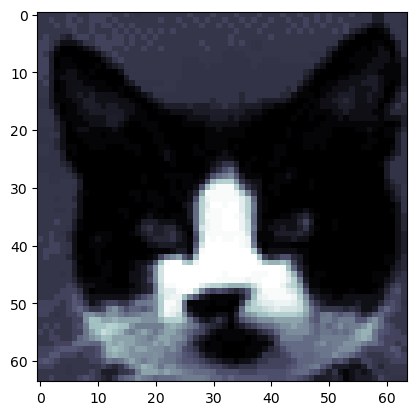

In [ ]:
# Plot the first cat image by reshaping its pixel vector to 64x64 and displaying it
fig, ax = plt.subplots()
ax.imshow(cats[:,0].reshape(64, 64).T, cmap=plt.cm.bone, interpolation='nearest')
plt.show() 

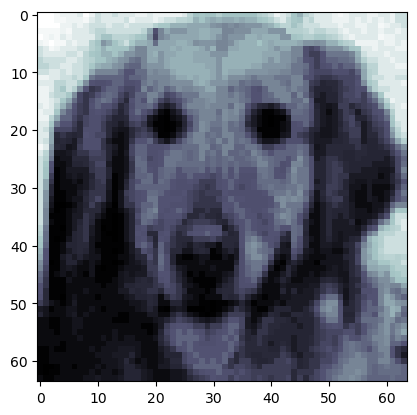

In [ ]:
# Plot the first dog image by reshaping its pixel vector to 64x64 and displaying it
fig, ax = plt.subplots()
ax.imshow(dogs[:,0].reshape(64, 64).T, cmap=plt.cm.bone, interpolation='nearest')
plt.show()

Next, we would like to create a standardization function. This function will find the mean and standard deviation of each image. We subtract the mean from each pixel and divide each pixel by the standard deviation. Write the function below.

Hint: To find the mean and standard deviation of each image, use `numpy`'s version of mean and stadnard deviation and use `axis=0`.

In [ ]:
# Define a function to standardize each image (column) by subtracting the mean and dividing by the std
def standardize(x):
    #This function takes as input a numpy array and returns a stadardized numpy array of the same dimensions.
    #Sample input: np.array([[1,2,3],[4,5,6]])
    #Sample output: np.array([[-1,-1,-1],[1,1,1]])
    #Substract mean divide by std for each image/column
    mean = np.mean(x, axis=0)
    std = np.std(x, axis=0)
    return (x - mean) /std

# Check the function with a sample array
standardize (np.array([[1,2,3],[4,5,6]]))

array([[-1., -1., -1.],
       [ 1.,  1.,  1.]])

Now, use the `np.concatenate` function to combine the cats and dogs arrays. Use `axis=1` to combine the two correctly. Make sure to put dogs first.

In [ ]:
# Concatenate the dogs and cats arrays along columns to create a combined pets array
pets = np.concatenate((dogs, cats), axis=1)
#Check the shape the combined array
print('Shape of pets array:', pets.shape)

Shape of pets array: (4096, 160)


Standardize the concatenated array below.

In [ ]:
# Standardize the combined pets array to have zero mean and unit variance per image
pets_std = standardize(pets)
#Check shape of the standardized array
print('Shape of pets_std:', pets_std.shape)

Shape of pets_std: (4096, 160)


## Challenge 2 - Using PCA

Now that we have created a standardized matrix of cats and dogs, we'll find the two most important components in the data.

Load the `PCA` function from `statsmodels` (read about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.multivariate.pca.PCA.html)) and apply the function to our standarized data. Create a PCA model with two components.

In [ ]:
# Apply PCA to the standardized pets array to reduce dimensionality to 2 components
from statsmodels.multivariate.pca import PCA
pca_model = PCA(pets_std, ncomp = 2)
#Check PCA model and factors shape
print('PCA factors shape:', pca_model.factors.shape)

PCA factors shape: (4096, 2)


Use `numpy` to find to transpose the standardized pet array. This will help us compute the projection.

In [ ]:
# Transpose the standardized pets array to prepare for projection onto principal components
pets_std_T = pets_std.T
#Check shape of the transposed array
print('Shape of transposed standardized pets array:', pets_std_T.shape)


Shape of transposed standardized pets array: (160, 4096)


Find the dot product of the transposed standardized pet matrix and the `factors` of the `PCA` model found above. This will be the projection onto 2 dimensions. This means that each cat and dog image will now only have two columns instead of 4096.

In [ ]:
# Project the transposed standardized pets array onto the principal components to get 2D representation
projection_2d = np.dot(pets_std_T, pca_model.factors)
#Check shape of the projected data
print('Shape of projection_2d:', projection_2d.shape)


Shape of projection_2d: (160, 2)


## Challenge 3 - Plotting the Data

Now that we have reduced our cats and dogs arrays, we can easily plot the data in a way that the human eye can understand. We can look at this plot to see whether there are differences between the cat and dog images. 

In the cell below, turn the two dimensional projection into a pandas dataframe and name the columns `pc1`, and `pc2` respectively.

In [ ]:
# Convert the 2D projection to a pandas DataFrame for easier plotting and analysis
df_proj = pd.DataFrame(projection_2d, columns=['pc1', 'pc2'])
#Check DataFrame shape
print('df_proj shape:', df_proj.shape)

df_proj shape: (160, 2)


Create a labels list. This list will be of size 160. The first 80 elements in the list will be the word `blue`, and the last 80 elements will be `red`. This will ensure that all dog observations will be colored in blue and all cats will be colored in red. Name this list `colors`.

In [46]:
# Create a color list for plotting: first 80 are blue (dogs), last 80 are red (cats)
colors = ['blue'] * 80 + ['red'] * 80
#Check colors list length and unique values
print('Length of colors:', len(colors))
print('Unique colors:', set(colors))

Length of colors: 160
Unique colors: {'blue', 'red'}


Create a scatter plot of `pc1` and `pc2` below. Use the `colors` list above to color the observations by setting `c=colors`.

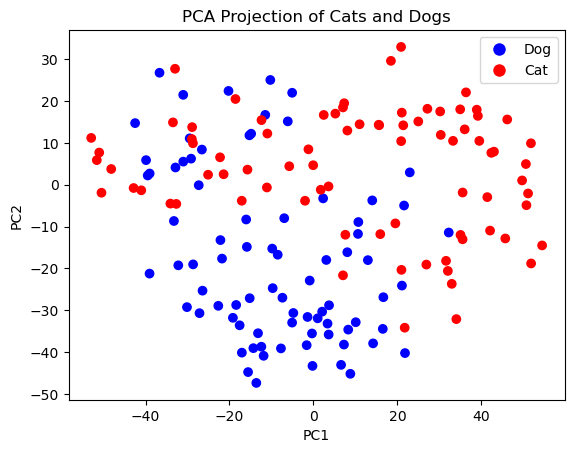

In [47]:
# Plot the PCA projection of cats and dogs with color coding and legend
plt.scatter(df_proj['pc1'], df_proj['pc2'], c=colors, label=None)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection of Cats and Dogs')
# Add legend for colors
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Dog', markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Cat', markerfacecolor='red', markersize=10)
]
plt.legend(handles=legend_elements)
plt.show()

Do you see a clear separation between cats and dogs? Write your answer below.

In [ ]:
# My conclusion:
#The PCA scatter plot shows a noticeable separation between the dog (blue) and cat (red) images. 
#Most points from each group cluster together, which suggests that PCA has captured meaningful differences between the two types of images. 
#However, there is some overlap between the clusters, so the separation is not absolute. 
#This means PCA is helpful for distinguishing cats from dogs, but additional analysis or features may be needed for perfect classification.